

# Project: Investigating why patients do not show up for appointment is Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limits">Limitations</a></li>
</ul>

<a id="intro"></a>
# INTRODUCTION

**This projects investigates why patients do not show up for appointments in Brasil. Taking many factors into consideration, our goal is to investigate if there are factors or a combination of factors that determine whether or not a patient will show up for their appointment.**

### **Some of the factors highlighted are listed below:**
<ul>
    <li>PatientID: A unique ID given to each Patient</li>
    <li>AppointmentID: A unique ID given for each booked appointment</li>
    <li>Gender: The gender of the patient</li>
    <li>ScheduleDay: The day Patient scheduled the appointment</li>
    <li>AppointmentDay: The specified day for the appointment</li>
    <li>Age: The age of the Patient</li>
    <li>Neighbourhood: The location of the hospital</li>
    <li>Scholarship: Indicate whether or not a Person is enrolled in the Government's welfare program</li>
    <li>Nature of ailment: some columns indicating the nature of ailment</li>
    <li>SMS_received: indicates wheter the person was reminded for the appointment</li>
</ul>



<a id="questions"></a>
# Questions
To provide the impetus for this analysis, we will ask some intriguing questions that will provide the direction for this analysis. Some of the questions are as follows:
<ol>
    <li>Does the gender of the Patient determine if they kept their appointment or not</li>
    <li>How does the Patient's age determine if they kept their appointment or not</li>
    <li>Does being enrolled in the Welfare program determine if they kept their appointment or not</li>
    <li>How did receiving a reminder SMS influenceed a Patients attitude to keep their appointment or not</li>
    <li>Finally, we want to investigate the relationship between the neighbourhood and keeping appointments</li>
</ol>



### GETTING READY
<ul>
    <li>Importing Necessary libraries</li>
    <li>Loading the Dataset</li>
    <li>Interacting and Familiarization With the Dataset</li>
</ul>

### Importing Necessary Libraries

In [2]:
# In this unit, I import the necessary libraries for the analysis
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 

#include matplotlib inline 'magic word' for visualizations
%matplotlib inline 


### Loading the Dataset
Let us load the dataset so that we can have a feel of the kind of data we are working with.

In [3]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_noshowappointments = pd.read_csv('noshowappointments.csv')
df_noshowappointments.head() # have a view of the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### General Properties

#### Descriptive Statistics

We take a quick desriptive statistics on the dataset to get a feel of the distribution of the dataset

In [3]:
df_noshowappointments.describe() # this step gives an overview of the data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can conclude from the descriptive stats above that the mean age is around 37 years. 25% of the Patients are less than 18 and 75% are less than 55. The mean age is -1 and the max age is 115. The other info we can gather from other datasets are the count, mean and standard deviation. For most of the datasets, other values are just 0.

In [4]:
df_noshowappointments.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The above cell gives detail information about the dataset, the columns available and their data type. It also provides the total number of entries in the dataset and memory usage

>We can see clearly that there are 14 columns altogether. As is the norm in Data Analysis, it is safe to conclude that there are 13 input vector columns ranging from 'PatientID' to 'SMS_received', the last column 'No-show' is the target column. 

<a id='wrangling'></a>
## Data Wrangling


In this section, we want to work on the dataset to ensure they are in the right format for our analysis. We are going to do the following:
<ul>
     <li> Check the amount of missing and duplicate values.</li>
    <li> Dropping all unneccesary columns in the dataset for analysis.</li>
</ul>


In [5]:
df_noshowappointments.isnull().sum() #checking for null values in each column

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
sum(df_noshowappointments.duplicated()) #checking for duplicated rows

0

>The last two cells showed that the dataset is pretty clean with no null values and duplicates

### Exploring the ScheduleDay and AppointmentDay Attributes
When we ran the info() function on the dataset, we observe that these two attributes are object (String) types. We need to convert them to datetime. This obviously will give an idea of the number of days that elapsed between the time the appointment was scheduled and the appointed date. People may not show up when appointment days take too long.

In [7]:
## We transform the object type variables to pandas datetime
df_noshowappointments['ScheduledDay'] = pd.to_datetime(df_noshowappointments.ScheduledDay)
df_noshowappointments['AppointmentDay'] = pd.to_datetime(df_noshowappointments.AppointmentDay)

# Having converted the AppointmentDay and ScheduleDay to datetime, let us create a column in the dataset to hold the number
# of days that elapsed before the appointed day
df_noshowappointments['WaitingDays'] = df_noshowappointments['AppointmentDay'] - df_noshowappointments['ScheduledDay']
df_noshowappointments['WaitingDays'] = df_noshowappointments.WaitingDays.dt.days
df_noshowappointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [8]:
df_noshowappointments['WaitingDays'].unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122])

In [9]:
df_noshowappointments['WaitingDays'].value_counts()

-1      38563
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 81         1
 126        1
 125        1
 150        1
 122        1
Name: WaitingDays, Length: 131, dtype: int64

Wow! there are negative days in the dataset. Amazingly, the number is huge. We may have to drop this instances from the dataset

In [10]:
df_noshowappointments.drop(df_noshowappointments[df_noshowappointments['WaitingDays'] < 0].index, inplace=True)
df_noshowappointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1


The dataset is pretty clean. Here I dropped columns that are unneccessary to the analysis to reduce the size of the data frame.

'PatientId','AppointmentID','ScheduledDay' and 'AppointmentDay' are not important to this analysis.

In [12]:
def drop_col(col_names): 
    '''A custom function to drop columns at once'''
    for col in col_names:
        df_noshowappointments.drop(col, inplace=True, axis=1)

In [13]:
drop_col(['PatientId','AppointmentID','ScheduledDay','AppointmentDay']) #patientID and AppointmentID columns are dropped

In [14]:
df_noshowappointments.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
5,F,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,F,19,CONQUISTA,0,0,0,0,0,0,No,1
10,F,30,NOVA PALESTINA,0,0,0,0,0,0,No,1


### No_Show Encoding

>I decided to encode the No_show column to a numerical datatype to enhance the analysis.

> To encode the enteries, i employed mapping in pandas. 
>>1. I create a dictionary object which convert objects from the dataframe to what we want. In this case, the dictionary will convert yes to 1 and no to zero. Dictionaries are data structures that have key/value pairs. In our case, yes & no will be keys while 0 and 1 will be values
>>2. We will map the dataframe series that we want to convert to the dictionary object.

In [8]:
# Create a dictionary to map the objects
noShow_label = {'Yes':0,'No':1}

In [9]:
# Map the dictionary to the series [the part of the dataframe that you want to encode]
df_noshowappointments['No-show'] = df_noshowappointments['No-show'].map(noShow_label)

# Print a part of the dataframe to see the result
df_noshowappointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis


### Using Pie charts to View Class Distribution

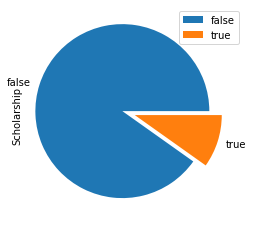

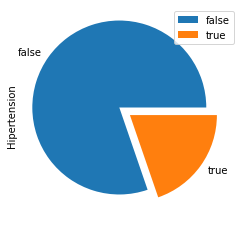

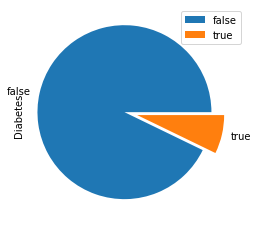

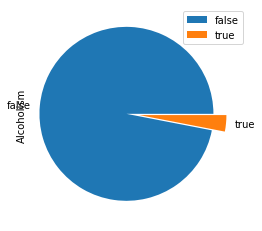

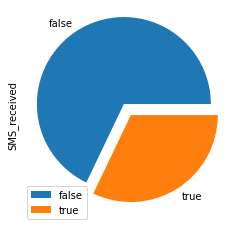

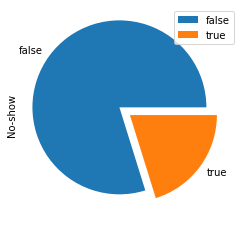

In [10]:
columns =['Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'SMS_received','No-show']
explode = [0.15, 0]
labels = ['false', 'true']
for col in columns:
    df_noshowappointments[col].value_counts().plot.pie(labels=labels, explode=explode)
    plt.legend()
    plt.show()

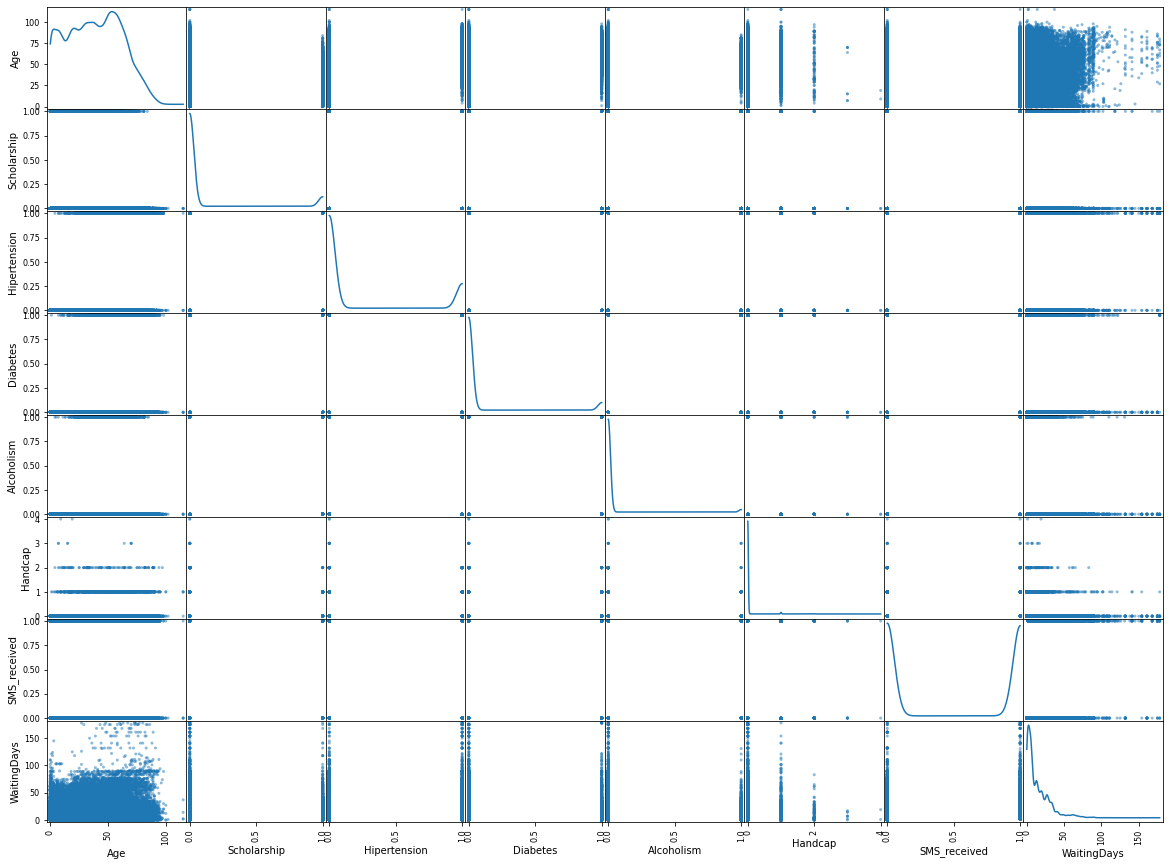

In [16]:
#plot to show the scatter distribution of all variables
pd.plotting.scatter_matrix(df_noshowappointments.loc[:, "Gender":], diagonal="kde",figsize=(20,15))
plt.show()

### Visualizing the correlation Between the Variables

Let us use a Seaborn heatmap to view the correlations between the columns in the dataset

In [17]:
corr = df_noshowappointments.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
Age,1.000000,-0.103038,0.500749,0.284477,0.080350,0.077141,-0.042537,-0.008608
Scholarship,-0.103038,1.000000,-0.027764,-0.025417,0.030529,-0.010446,0.020666,-0.026177
Hipertension,0.500749,-0.027764,1.000000,0.425614,0.085821,0.083643,-0.037065,-0.051121
Diabetes,0.284477,-0.025417,0.425614,1.000000,0.024174,0.061513,-0.031219,-0.048246
Alcoholism,0.080350,0.030529,0.085821,0.024174,1.000000,0.013501,-0.009095,-0.029137
Handcap,0.077141,-0.010446,0.083643,0.061513,0.013501,1.000000,-0.022107,-0.015865
SMS_received,-0.042537,0.020666,-0.037065,-0.031219,-0.009095,-0.022107,1.000000,0.201789
WaitingDays,-0.008608,-0.026177,-0.051121,-0.048246,-0.029137,-0.015865,0.201789,1.000000


This heatmap may not seem to be very much informative as it does not show the direct correlations between the variables and the target, however, viewing correlations among the variables will reveal hidden patterns in the dataset. In addition, we want to know the level of dependency amongst the variables. This usually affect affects the target in some way.

This dataset seem to be very independent. With the exception of the high positive correlations between age and hypertentio as well as diabetes and hypertension, most of the variables show negligible correlations

In [46]:
def hist_plot_by(col_title, xlabel, ylabel, title):
    ''' A function to draw a histgram '''
    ax = plt.subplot(1,1,1)
    ax.legend()
    ax.grid()
    ax.hist(col_title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
plt.show()

### Research Question 1 - What is the relationship between age of patients and no-show?

No handles with labels found to put in legend.


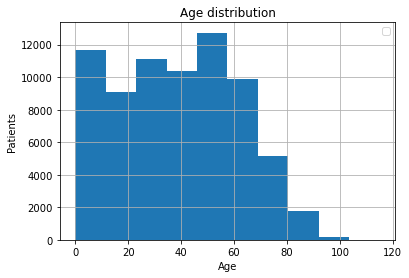

In [47]:
#df_noshowappointments['Age'].hist() # this plots the distribution of the age column 
hist_plot_by(df_noshowappointments['Age'], 'Age', 'Patients','Age distribution')

The plot above reveals that the age column is normally distrubted and is right skewed. This means that most of the entries are towards the right side of the mean or are greater than the mean.

This speaks to the bias of the dataset. We can conclude that the population sample favours people above 37 years of age (mean age)

In [22]:
mean_age = df_noshowappointments.groupby('No-show', as_index=False)['Age'].mean() #groups the dataset by No-show and calculates the mean age
mean_age

,No-show,Age
0,No,39.965706
1,Yes,34.835299


<AxesSubplot:>

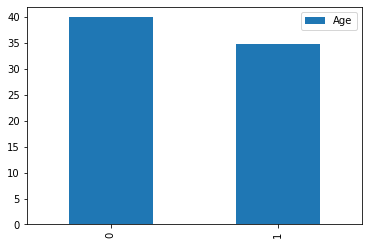

In [23]:
mean_age.plot.bar()

From the chart above, it is revealed that on the average older citizens showed up for their appointments compared to the older folks.

### Understanding the Age Distribution
From the histogram above, it is clear that have little understanding of the age distribution. We will use pandas cut function to put the age column into five groups for better understanding
We first find the maximum and minimum ages to know the number of categories to have

In [110]:
print(f'{df_noshowappointments.Age.min()}, {df_noshowappointments.Age.max()}')

0, 115


In [24]:
age_dist = pd.cut(df_noshowappointments['Age'], bins=[-2, 14, 20, 30, 70, 120], 
                  labels=['children', 'teenagers', 'young adults', 'adults', 'seniors'])
age_dist.value_counts()


df_noshowappointments.groupby('No-show', as_index=False)['Age'].mean()

adults          38047
children        13721
young adults     9051
seniors          5947
teenagers        5193
Name: Age, dtype: int64

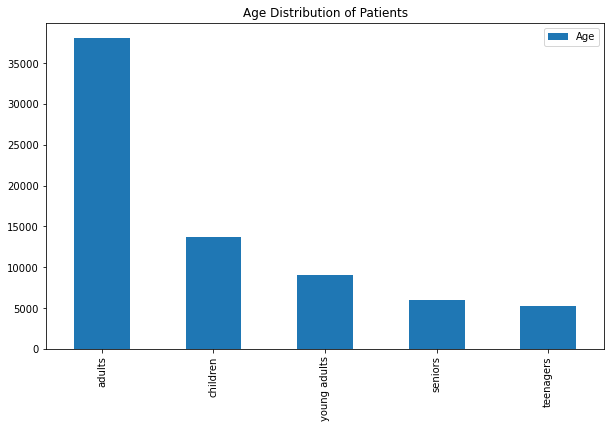

In [43]:

age_dist.value_counts().plot.bar(title='Age Distribution of Patients', figsize=(10, 6)).legend()

We can see clearly that the majority of the people are adults aged between 30 and 70. A little above 20,000 Patients were children. Young adults [20-30], teenagers [13-20] and seniors[70 above] all have populayions less than 15,000 each.

### Research Question 2 : What is the relationship between scholarship and no-show 

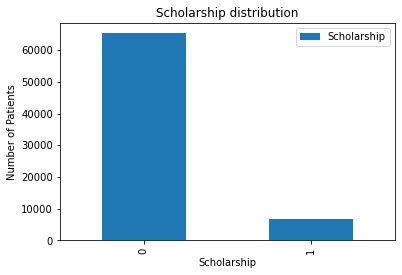

In [42]:

df_noshowappointments['Scholarship'].value_counts().plot(kind='bar', title='Scholarship distribution', xlabel='Scholarship', ylabel='Number of Patients').legend(); #plots the count of patients on scholarship and those not on a scholarship

This chart reveals that more patients are not on any form of scholarship

In [66]:
Scholarship_show = df_noshowappointments.groupby(by='Scholarship')['No-show'].value_counts()
Scholarship_show

Scholarship  No-show
0            No         47099
             Yes        18189
1            No          4338
             Yes         2333
Name: No-show, dtype: int64

<AxesSubplot:title={'center':'relationship between Scholarship and No_show'}, xlabel='Scholarship,No-show', ylabel='number of patients'>

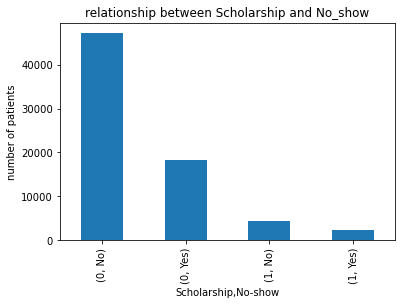

In [92]:
Scholarship_show.plot.bar(ylabel='number of patients', title='Relationship between Scholarship and No_show')

From the chart above, comparing the population of patients that are not on scholarship with those on scholarship, more non-scholarship patients showed up. 

### Research Question 3: Does recieving an SMS affects showing up for appointment?

In [38]:
SMS = df_noshowappointments.groupby(by='SMS_received')['No-show'].value_counts().sort_index()
SMS

SMS_received  No-show
0             No         25739
              Yes        10738
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

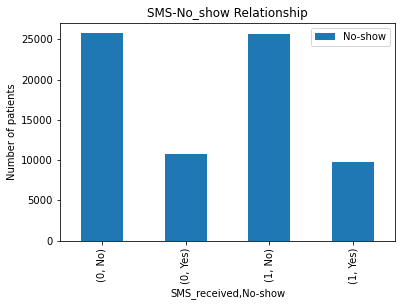

In [41]:
SMS.plot.bar(title='SMS-No_show Relationship',ylabel='Number of patients').legend()

From the table above, the difference between receiving SMS or not does not seem to affect meeting up with an appointment

### Let us View the Relationship Between Gender and Showing up

In [51]:
gender_show = df_noshowappointments.groupby(by='Gender')['No-show'].value_counts().sort_index()
gender_show

Gender  No-show
F       No         34396
        Yes        13674
M       No         17041
        Yes         6848
Name: No-show, dtype: int64

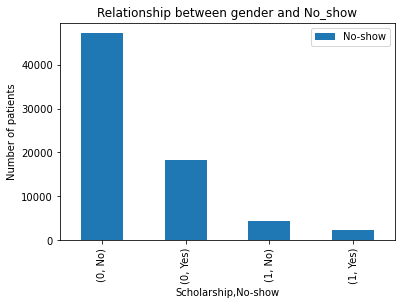

In [91]:
gender_show.plot(kind='bar',ylabel='Number of patients',title='Relationship between gender and No_show').legend()

The female population exceedes the male population. More females tend to show up for their appointments compared to the males. 

### Let us View the Relationship Between handicap and Showing up

In [99]:
handicap.unique()

array([50464, 20188,   888,   297,    78,    34,     6,     2,     1])

There seems to be some weird things going on here. This value is supposed to be a boolean value having values in the range [0,1] indicating whether a person is handicapped or not. let's quickly take care of that. We will convert all the values greater than 0 to 1

In [100]:
# Run through the series named Handcap. Any value greater than 0, convert to 1
df_noshowappointments['Handcap'] = np.where(df_noshowappointments['Handcap'] > 0, 1, 0)

In [101]:
handicap = df_noshowappointments.groupby(by='Handcap')['No-show'].value_counts().sort_index()
handicap

Handcap  No-show
0        No         50464
         Yes        20188
1        No           973
         Yes          334
Name: No-show, dtype: int64

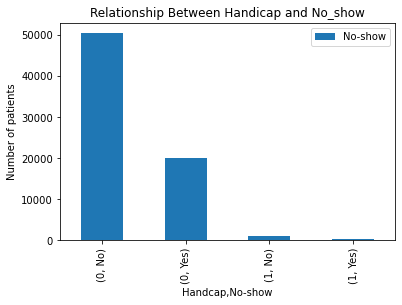

In [102]:
handicap.plot.bar(ylabel='Number of patients', title='Relationship Between Handicap and No_show').legend()

Quite a number of handicaped people showed up for their appointment. 20188 did not show up though. We may infer that this could be a reason why more people didn't show up

In [84]:
Neighbourhood_show = df_noshowappointments.groupby(by='Neighbourhood')['No-show'].value_counts()
Neighbourhood_show

Neighbourhood    No-show
AEROPORTO        No            4
                 Yes           1
ANDORINHAS       No         1033
                 Yes         491
ANTÔNIO HONÓRIO  No          137
                            ... 
TABUAZEIRO       Yes         526
UNIVERSITÁRIO    No           81
                 Yes          31
VILA RUBIM       No          462
                 Yes         136
Name: No-show, Length: 159, dtype: int64

<AxesSubplot:title={'center':'Relationship Between Neighbourhood and No_show'}, xlabel='Neighbourhood,No-show', ylabel='Number of patients'>

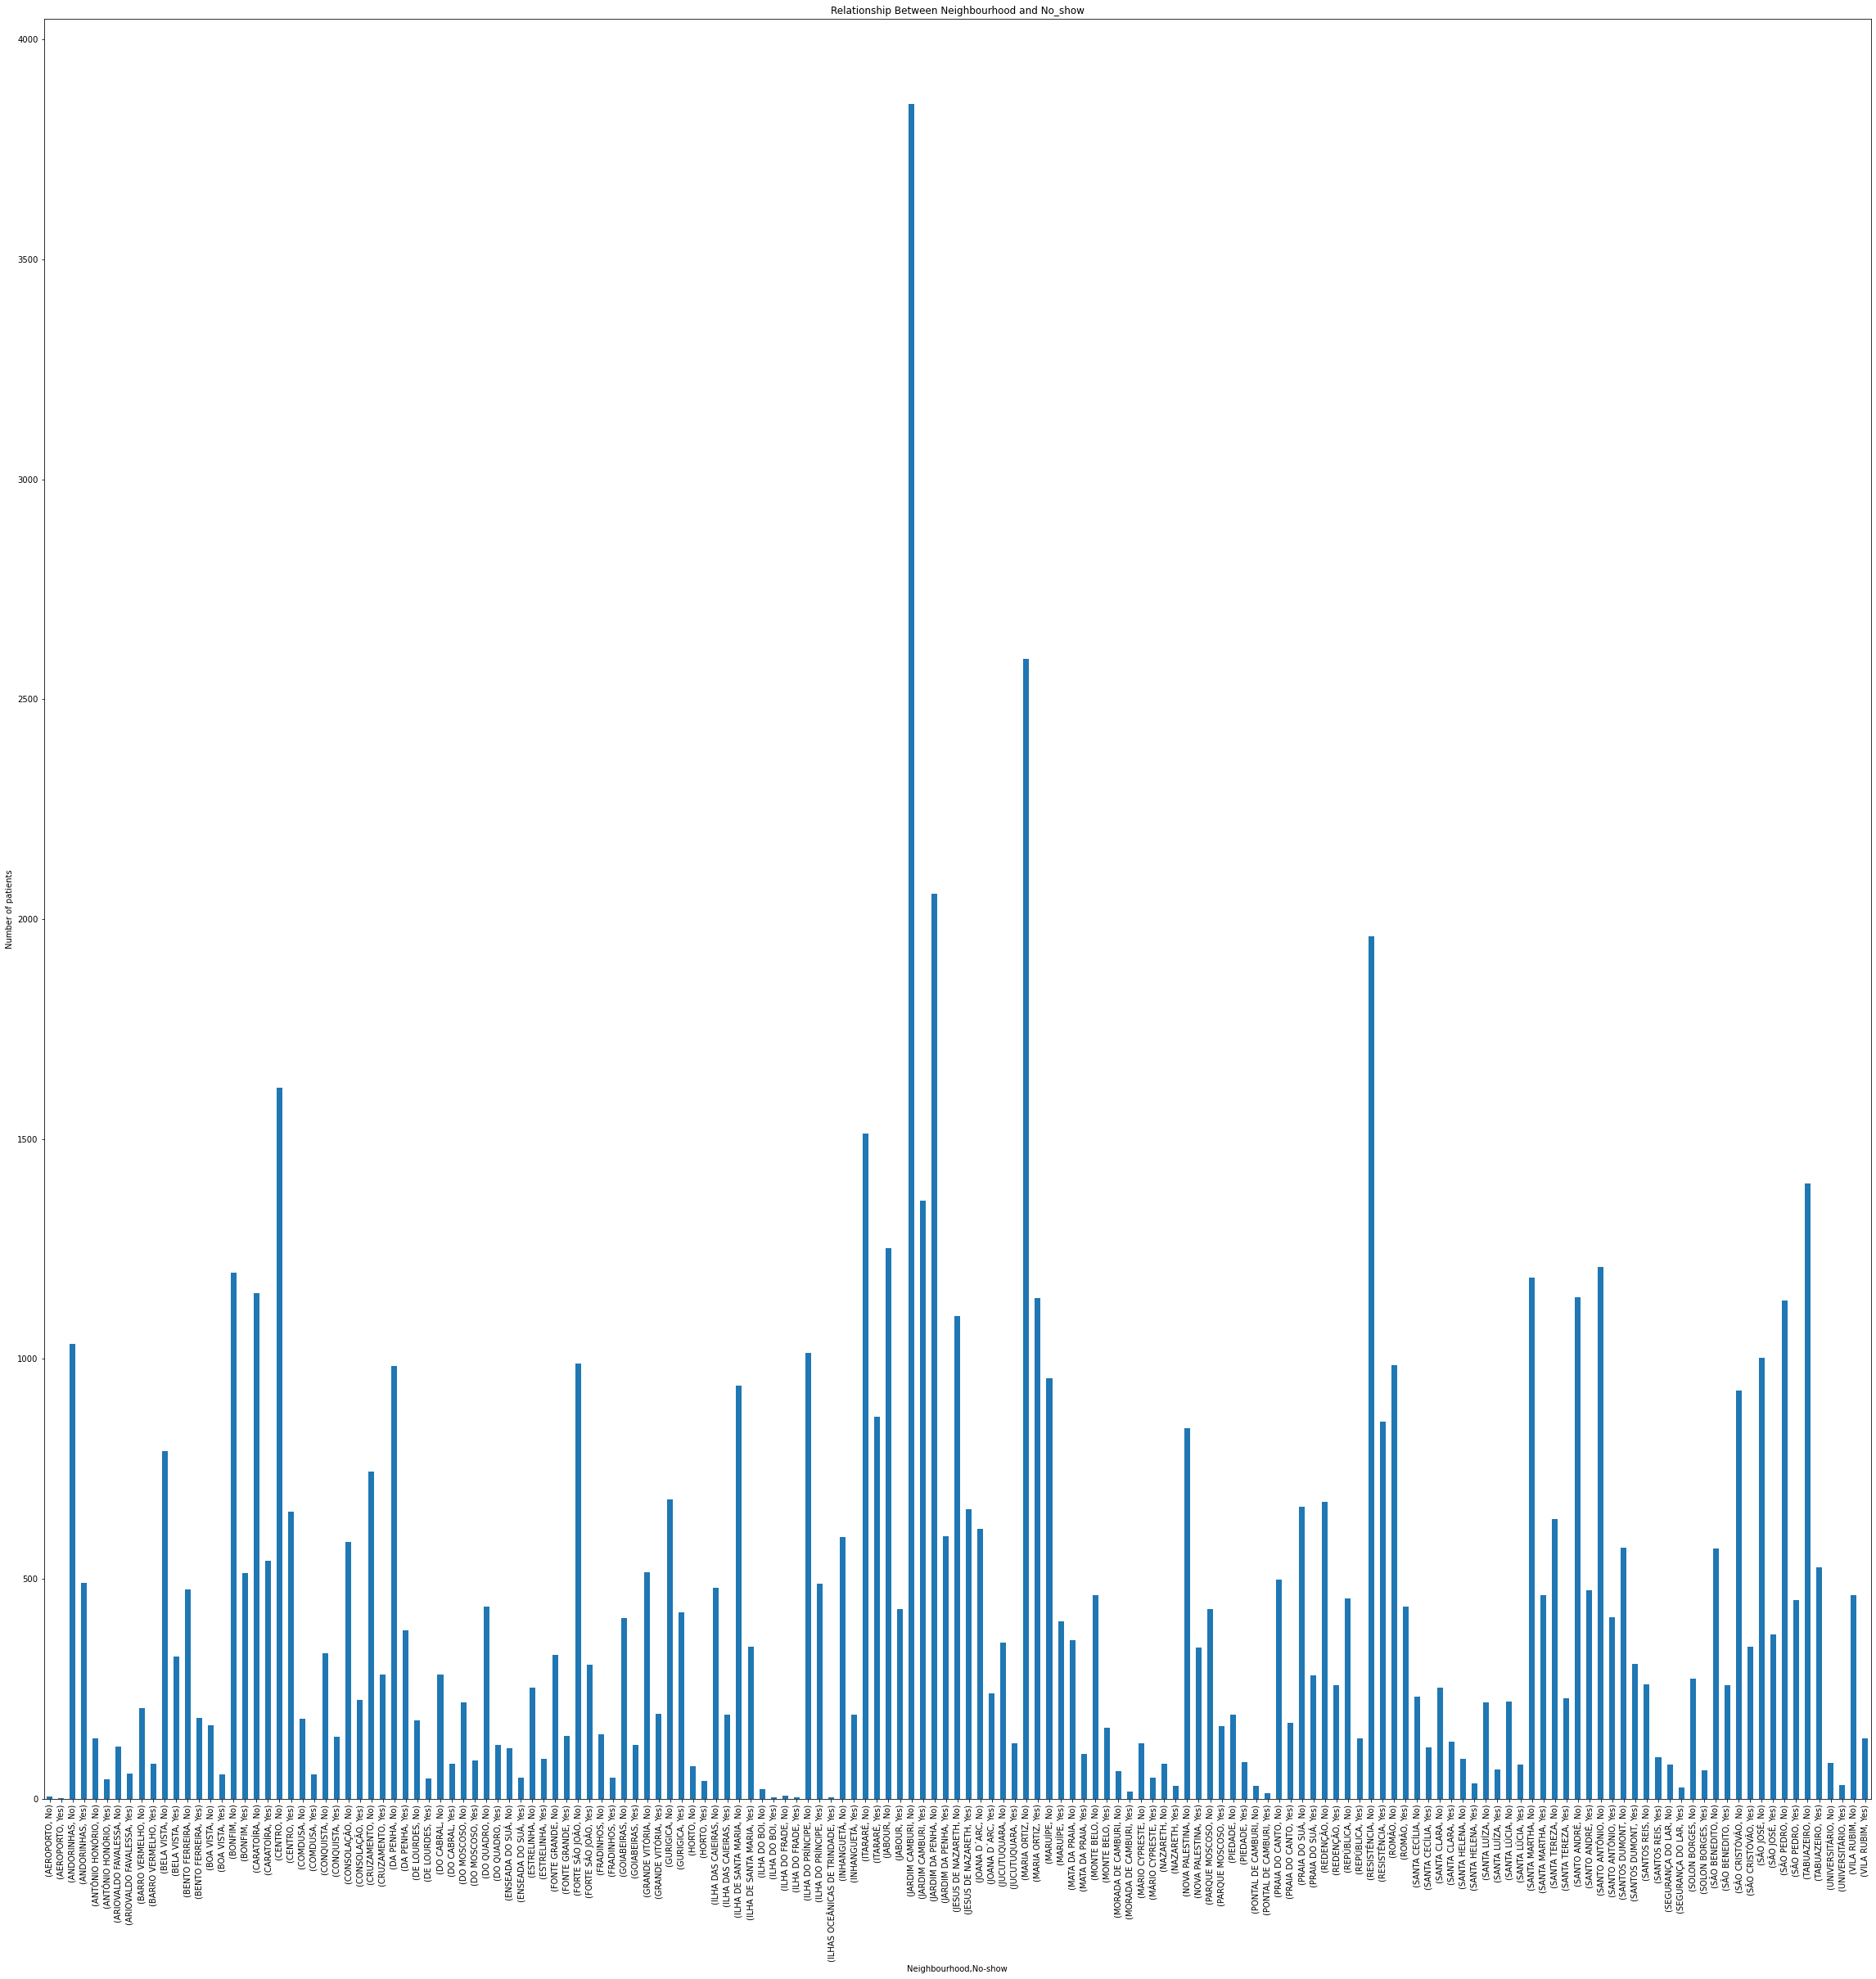

In [90]:
Neighbourhood_show.plot(kind='bar',figsize=(40,40),ylabel='Number of patients', title='Relationship Between Neighbourhood and No_show')

Jardim Camburi, Maria ortiz, Jardim Da Penha, ranks highest in terms of number of patients who showed up for their appointsments.
Resistencia, Maria Ortiz, Jardim Camburi, ranks top of the no show table.

>This can be possibly linked to population size in those Neighbourhood which can be linked to tourism and recreation. 


<a id='conclusions'></a>
# Conclusions


We briefly analyzed the Appointment dataset and got familiar with the dataset. We performed some data warangling as well as Exploratory Data Analysis on the data. Finally, we drew some conclusions and inferences from the relationship in the dataset.

From the analysis, we can conclude that
<ul>
    <li>SMS notification has no effect on patient showing up for appointment </li>
    <li>Younger citizens showed up for their appointments more than older folks</li>
    <li>More females showed up for their appointments compared to the males. </li>
    <li>comparing the population of patients that are not on scholarship with those on scholarship, more non-scholarship patients showed up.  </li>
    <li>No tangible relationship between neigbhood and showing up. Areas with high show up equally had high no show up  </li>
</ul>


<a id='limits'></a>

# Analysis Limitations
There were a few limitations, in my opinion on the dataset. Some are briefly enumerated:
1. There was no detailed information on the data collection process to guide analysis. Some Analysis require Domain experts, hence, I had to make certain assumptions. for example, I assumed that there could be no age -1. It may be that -1 was used to record the age of infants less than a year.
2. The neighbourhood indicated the location of the hospital i guessed. The dataset should have also included the distance from the Patients house to the venue. This may also help us see if distance was a barrier to keeping with the appointments.

From the above analysis, it can be concluded that young people show up more for their appointments that the older folks.
Also, having a form of scholarship did not have much positive effects of whether patients showed up for appointment or not.
Finally, one can conlude that since less patients recieved, this affects showing up negatively. 



# THE END